In [7]:
from qiskit import *
from qiskit_ibm_provider import IBMProvider
# import qiskit_ibm_provider.jupyter

In [8]:
%ibm_quantum_dashboard

UsageError: Line magic function `%ibm_quantum_dashboard` not found.


In [10]:
provider = IBMProvider()

AccountNotFoundError: 'No default ibm_quantum account saved.'

In [11]:
from qiskit_ibm_provider import least_busy

backend = least_busy(
    provider.backends(
        simulator=False, filters=lambda b: b.configuration().n_qubits >= 5
    )
)

qc.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

mapped_circuit = transpile(qc, backend=backend)
job = backend.run(mapped_circuit, shots=1024)


NameError: name 'provider' is not defined

In [1]:
%reset -f
#%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, IBMQ, QuantumRegister
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit import transpile
from qiskit.compiler import transpile, assemble
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
import numpy as np
#provider = IBMQ.load_account()

    
# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

#constants
n = 4
lambd = 1.2

def thetak(k,lamb):
    num = lamb - np.cos(2*np.pi*k/n)
    denom = np.sqrt( (lamb-np.cos(2*np.pi*k/n))**2 + np.sin(2*np.pi*k/n)**2)
    theta = np.arccos(num/denom)
    return theta

#Create functions based on the decomposition included in appendix of Ising paper
def bog(qcirc, q1, q2, theta):
    qcirc.x(q2)
    qcirc.cx(q2, q1)
    #Controlled RX gate
    qcirc.rz(np.pi/2, q2)
    qcirc.ry(theta/2, q2)
    qcirc.cx(q1, q2)
    qcirc.ry(-theta/2, q2)
    qcirc.cx(q1, q2) #changed from qc to qcirc here - Bruna
    qcirc.rz(-np.pi/2, q2)
    #####################
    qcirc.cx(q2, q1)
    qcirc.x(q2)
    qcirc.barrier()
    return qcirc
    
def fourier(qcirc, q1, q2, phase):
    qcirc.rz(phase, q1)
    qcirc.cx(q1, q2)
    #Controlled Hadamard
    qcirc.sdg(q1)
    qcirc.h(q1)
    qcirc.tdg(q1)
    qcirc.cx(q2, q1)
    qcirc.t(q1)
    qcirc.h(q1)
    qcirc.s(q1)
    ####################
    qcirc.cx(q1, q2)
    qcirc.cz(q1, q2)
    qcirc.barrier()
    return qcirc

def digit_sum(n):
    num_str = str(n)
    sum = 0
    for i in range(0, len(num_str)):
        sum += int(num_str[i])
    return sum

def ground_state(lamb, backend_name): # backend is now an imput, so we can plot 
                                      # different ones easily - Bruna
    # Create a quantum Circuit with 4 quantum bits and 3 classical
    qc = QuantumCircuit(4, 4)
    #Set correct ground state if lambda < 1
    if lamb < 1:
        qc.x(3)
        qc.barrier()
    #magnetization
    mag = []
    
    #Apply disentangling gates
    qc = bog(qc, 0, 1, thetak(1.,lamb))
    qc = fourier(qc, 0, 1, 2*np.pi/n)
    qc = fourier(qc, 2, 3, 0.)
    qc = fourier(qc, 0, 1, 0.)
    qc = fourier(qc, 2, 3, 0.)
    #Set measurement step
    for i in range(0,4):
        qc.measure(i,i)
        
    #backend = Aer.get_backend(backend_name)
    # Using a fake backend included in qiskit
    backend = FakeManilaV2()
    shots = 1024
    max_credits = 10 #Max number of credits to spend on execution
    job = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
    job_monitor(job)
    result = job.result()
    counts = result.get_counts(qc)
    ##while not '0000' in counts:
    #    job = execute(qc, backend=backend, shots=shots, max_credits=max_credits)
    #    job_monitor(job)
    #    result = job.result()
    #    counts = result.get_counts(qc)
    #Check what ground state is based on lambda
    
    r1=list(counts.keys())
    r2=list(counts.values())
    M=0
    for j in range(0,len(r1)):
        M=M+(4-2*digit_sum(r1[j]))*r2[j]/shots
    #print("$\lambda$: ",lam,", $<\sigma_{z}>$: ",M/4)
    mag.append(M/4)
    return mag
    
   # if lamb < 1:
   #     return counts['0001']
   # return counts['0000']/shots # it does not always works, sometimes it returns keyword error 
                                # maybe we can add another else for the possibility of other states, but 
                                # do not use it for plotting - Bruna


print(ground_state(lambd, 'qasm_simulator'))
#print(ground_state(.8,'statevector_simulator'))

Job Status: job has successfully run
[0.890625]


c:\Users\timmy\OneDrive\GradSchool\QuantumInfo\qiskitEnvironment\lib\site-packages\qiskit\providers\fake_provider\fake_backend.py:354: RuntimeWarning: Aer not found using BasicAer and no noise
  warnings.warn("Aer not found using BasicAer and no noise", RuntimeWarning)
c:\Users\timmy\OneDrive\GradSchool\QuantumInfo\qiskitEnvironment\lib\site-packages\qiskit\utils\deprecation.py:182: UserWarning: Option max_credits is not used by this backend
  return func(*args, **kwargs)


In [2]:
lmbd = np.arange(.2, 1.75, 0.1)
sigmaz = []
for l in lmbd:
    sigmaz.append(ground_state(l, 'qasm_simulator'))
    
print(sigmaz)

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
[[0.0947265625], [0.1435546875], [0.1923828125], [0.21484375], [0.25390625], [0.2666015625], [0.341796875], [0.310546875], [0.859375], [0.849609375], [0.9052734375], [0.9013671875], [0.9169921875], [0.9326171875], [0.9248046875], [0.9287109375]]


(0.0, 1.8)

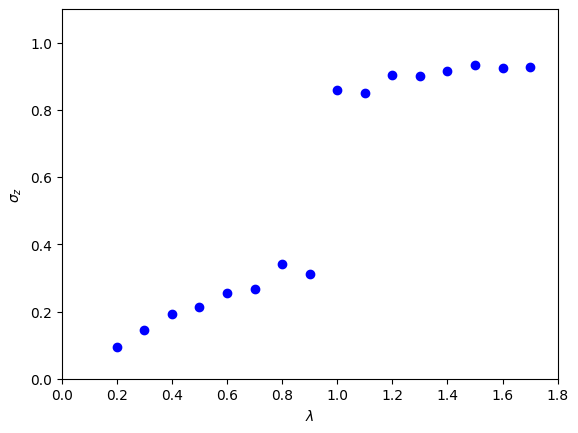

In [3]:

plt.plot(lmbd, sigmaz,'bo')
plt.ylabel("$\sigma_z$")
plt.xlabel("$\lambda$")
plt.ylim(0., 1.1)
plt.xlim(0., 1.8)

Job Status: job has successfully run


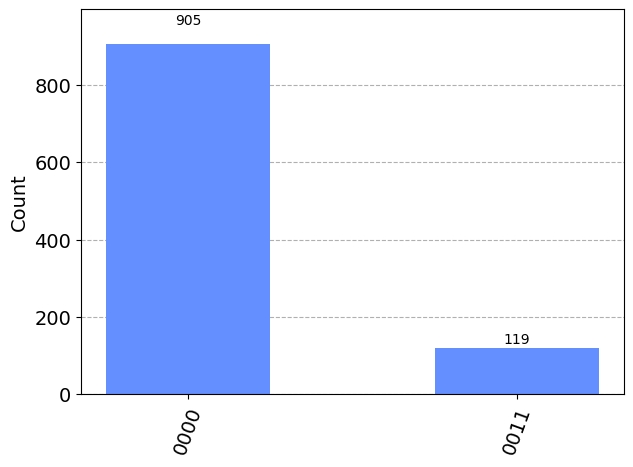

In [4]:
#Start up and initialize circuit
#Measurement
qc = QuantumCircuit(4, 4)
    #Set correct ground state if lambda < 1
if lambd < 1:
    qc.x(3)
    qc.barrier()

    #Apply disentangling gates
qc = bog(qc, 0, 1, thetak(1.,1.2))
qc = fourier(qc, 0, 1, 2*np.pi/n)
qc = fourier(qc, 2, 3, 0.)
qc = fourier(qc, 0, 1, 0.)
qc = fourier(qc, 2, 3, 0.)
    #Set measurement step
for i in range(0,4):
    qc.measure(i,i)
    

    
# Using a fake backend provided with qiskit

backend = FakeManilaV2()
# Transipling essentially converts the circuit into a something that can run on the specific hardware specified
transpiled_circuit = transpile(qc, backend)
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()

shots = 1024
max_credits = 10 #Max number of credits to spend on execution
job = execute(qc, backend=backend, shots=shots, max_credits=max_credits)  
job_monitor(job)
result = job.result()
counts = result.get_counts(qc)
#print(counts['0000'])
plot_histogram(counts)

# had to comment this part because qc is a local variable in groundstate function now - Bruna

In [5]:
phi = np.arccos(lambd/np.sqrt(1+lambd**2))/2
#print(result.get_statevector(qc))
print("|0000> probability should be: ",np.cos(phi)**2)
print("|0011> probability should be: ",np.sin(phi)**2 )

|0000> probability should be:  0.8841106397986879
|0011> probability should be:  0.11588936020131207
